<a href="https://colab.research.google.com/github/Yomunozs/Senales_Sistemas/blob/main/4_Transformada_Laplace/Ejercicio_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Encuentre la función de transferencia (demostración matemática) para un circuito RLC paralelo (entrada: fuente de corriente AC, salida: corriente en inductor), con condiciones iniciales cero. Luego, utilizando la API de control de sympy, simular y graficar: i) diagrama de polos y ceros, ii) diagrama de bode iii) respuesta impulso, iv) respuesta escalón, v) respuesta rampa. (Ver https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/8_FraccionesParcialesLaplace_CircuitoRLC.ipynb)

In [30]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace

X = 1/s # Ajustar según tipo de entrada
H=control.TransferFunction((R*L*C*s**2)+L*s+R,(R*L*C*s**2)+L*s,s) #Funcion de transferencia con la API de control, reemplazar  con la funcion para circuito en paralelo
#Hlc = H/(1+H) #para lazo cerrado

Y = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y


       2          
C⋅L⋅R⋅s  + L⋅s + R
──────────────────
  ⎛       2      ⎞
s⋅⎝C⋅L⋅R⋅s  + L⋅s⎠

In [31]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

     2  3                 2    
    C ⋅R         R     C⋅R  - L
───────────── + ──── - ────────
L⋅(C⋅R⋅s + 1)      2     L⋅s   
                L⋅s            

In [32]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

      -t                  
      ───                 
   2  C⋅R            2    
C⋅R ⋅ℯ      R⋅t   C⋅R  - L
───────── + ─── - ────────
    L        L       L    

In [33]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

             -5⋅t 
             ─────
               2  
      1   4⋅ℯ     
2⋅t + ─ + ────────
      5      5    

In [34]:
#Función de salida Y(s) -- Laplace
Ye

     8          1    2 
──────────── + ─── + ──
   ⎛2⋅s    ⎞   5⋅s    2
25⋅⎜─── + 1⎟         s 
   ⎝ 5     ⎠           

In [35]:
#Función de salida y(t) -- en tiempo
yt

             -5⋅t 
             ─────
               2  
      1   4⋅ℯ     
2⋅t + ─ + ────────
      5      5    

**Diagrama de polos y ceros utilizando la API de control**

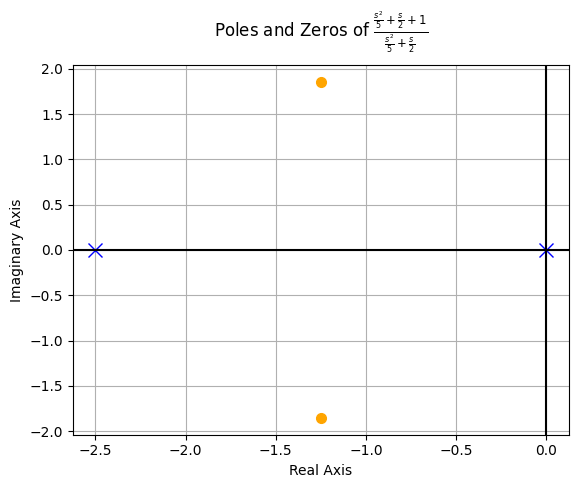

In [37]:
HRLC=control.TransferFunction(H.num.subs(RLC),H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

**Diagrama de bode**

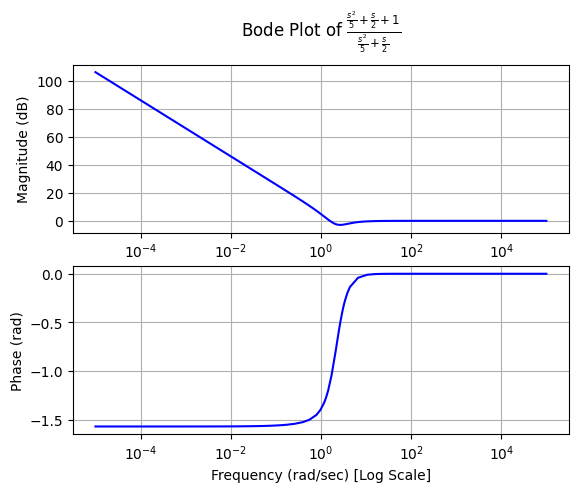

In [38]:
control.bode_plot(HRLC)

**Respuesta al impulso**

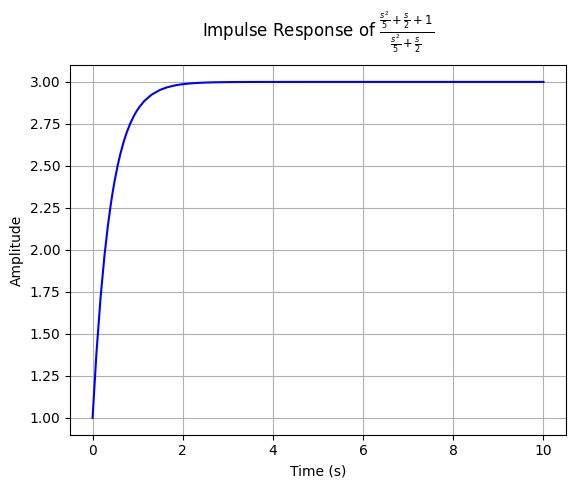

In [39]:
control.impulse_response_plot(HRLC)

**Respuesta al escalon**

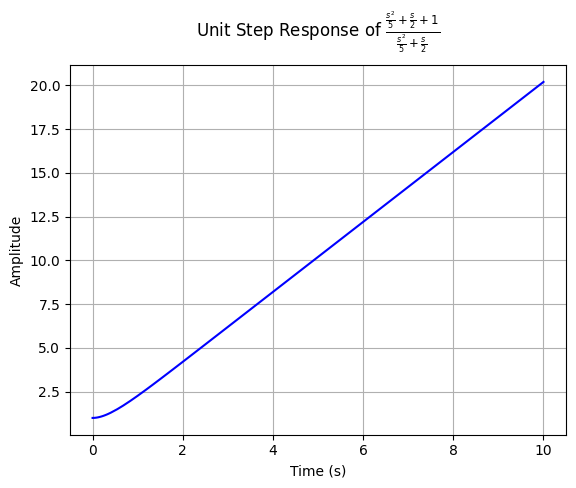

In [40]:
control.step_response_plot(HRLC)

**Respuesta a la rampa**

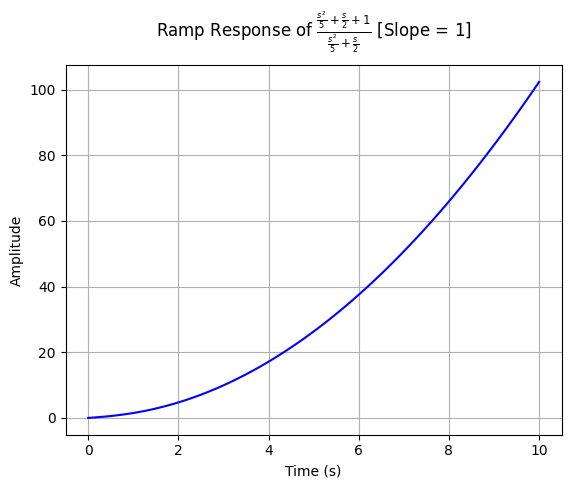

In [41]:
control.ramp_response_plot(HRLC)